# Load and inspect data

Dataset shape: (1761, 10)
Start date: 2018-01-02 00:00:00
End date: 2024-12-31 00:00:00

Columns (tickers): ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'NVDA', 'META', 'TSLA', 'JNJ', 'JPM', 'XOM']

Number of observations per ticker:
AAPL    1761
MSFT    1761
AMZN    1761
GOOG    1761
NVDA    1761
META    1761
TSLA    1761
JNJ     1761
JPM     1761
XOM     1761
dtype: int64

Missing values per ticker:
AAPL    0
MSFT    0
AMZN    0
GOOG    0
NVDA    0
META    0
TSLA    0
JNJ     0
JPM     0
XOM     0
dtype: int64

Summary statistics:
            mean         std        min         max
AAPL  121.968482   59.175667  33.832439  258.103729
MSFT  236.429777  106.712990  78.332176  463.240967
AMZN  129.309155   38.871080  59.450500  232.929993
GOOG  101.426360   39.420082  48.479244  197.520325
NVDA   28.899104   35.659232   3.150743  148.837341
META  264.452587  119.855883  88.424896  631.122559
TSLA  158.092595  112.432886  11.931333  479.859985
JNJ   135.477930   18.897445  95.070244  167.566498
JPM  

<Figure size 1200x600 with 0 Axes>

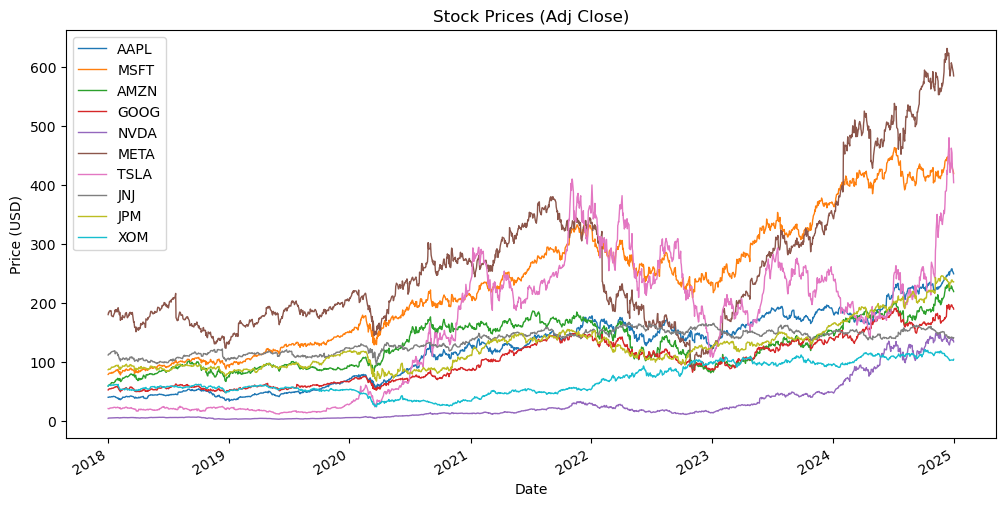

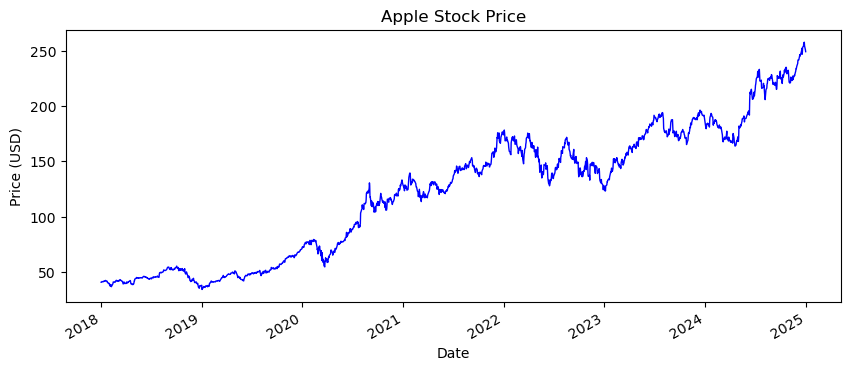

In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm
import os


# Load the combined dataset
df = pd.read_csv("../data/processed/prices.csv", index_col=0, parse_dates=True)

# Basic inspection
print("Dataset shape:", df.shape)
print("Start date:", df.index.min())
print("End date:", df.index.max())

print("\nColumns (tickers):", df.columns.tolist())

# Check coverage
coverage = df.notna().sum()
print("\nNumber of observations per ticker:")
print(coverage)

# Missing values
missing = df.isna().sum()
print("\nMissing values per ticker:")
print(missing)

# Summary statistics
summary_stats = df.describe().T[["mean", "std", "min", "max"]]
print("\nSummary statistics:")
print(summary_stats)

# Basic plots
plt.figure(figsize=(12,6))
df.plot(figsize=(12,6), title="Stock Prices (Adj Close)", lw=1)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.show()

# Plot check
df["AAPL"].plot(figsize=(10,4), title="Apple Stock Price", lw=1, color="blue")
plt.ylabel("Price (USD)")
plt.show()

# Compute returns

Summary statistics of returns:


,count,mean,std,min,25%,50%,75%,max
AAPL,1760.0,0.001035,0.019246,-0.137708,-0.008067,0.001275,0.011440,0.113157
MSFT,1760.0,0.000947,0.018207,-0.159453,-0.007539,0.001280,0.010674,0.132929
AMZN,1760.0,0.000742,0.021681,-0.151398,-0.009926,0.001180,0.012151,0.126949
GOOG,1760.0,0.000726,0.019380,-0.117667,-0.008788,0.001568,0.010912,0.099380
NVDA,1760.0,0.001878,0.032413,-0.207711,-0.015350,0.002859,0.019731,0.218088
META,1760.0,0.000668,0.026733,-0.306391,-0.010889,0.000998,0.013603,0.209307
TSLA,1760.0,0.001670,0.039999,-0.236518,-0.018955,0.001640,0.020803,0.198187
JNJ,1760.0,0.000131,0.012348,-0.105781,-0.005492,0.000403,0.006060,0.076940
JPM,1760.0,0.000566,0.018603,-0.162106,-0.007799,0.000668,0.009075,0.165620
XOM,1760.0,0.000321,0.019532,-0.130391,-0.009791,0.000248,0.010640,0.119442


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

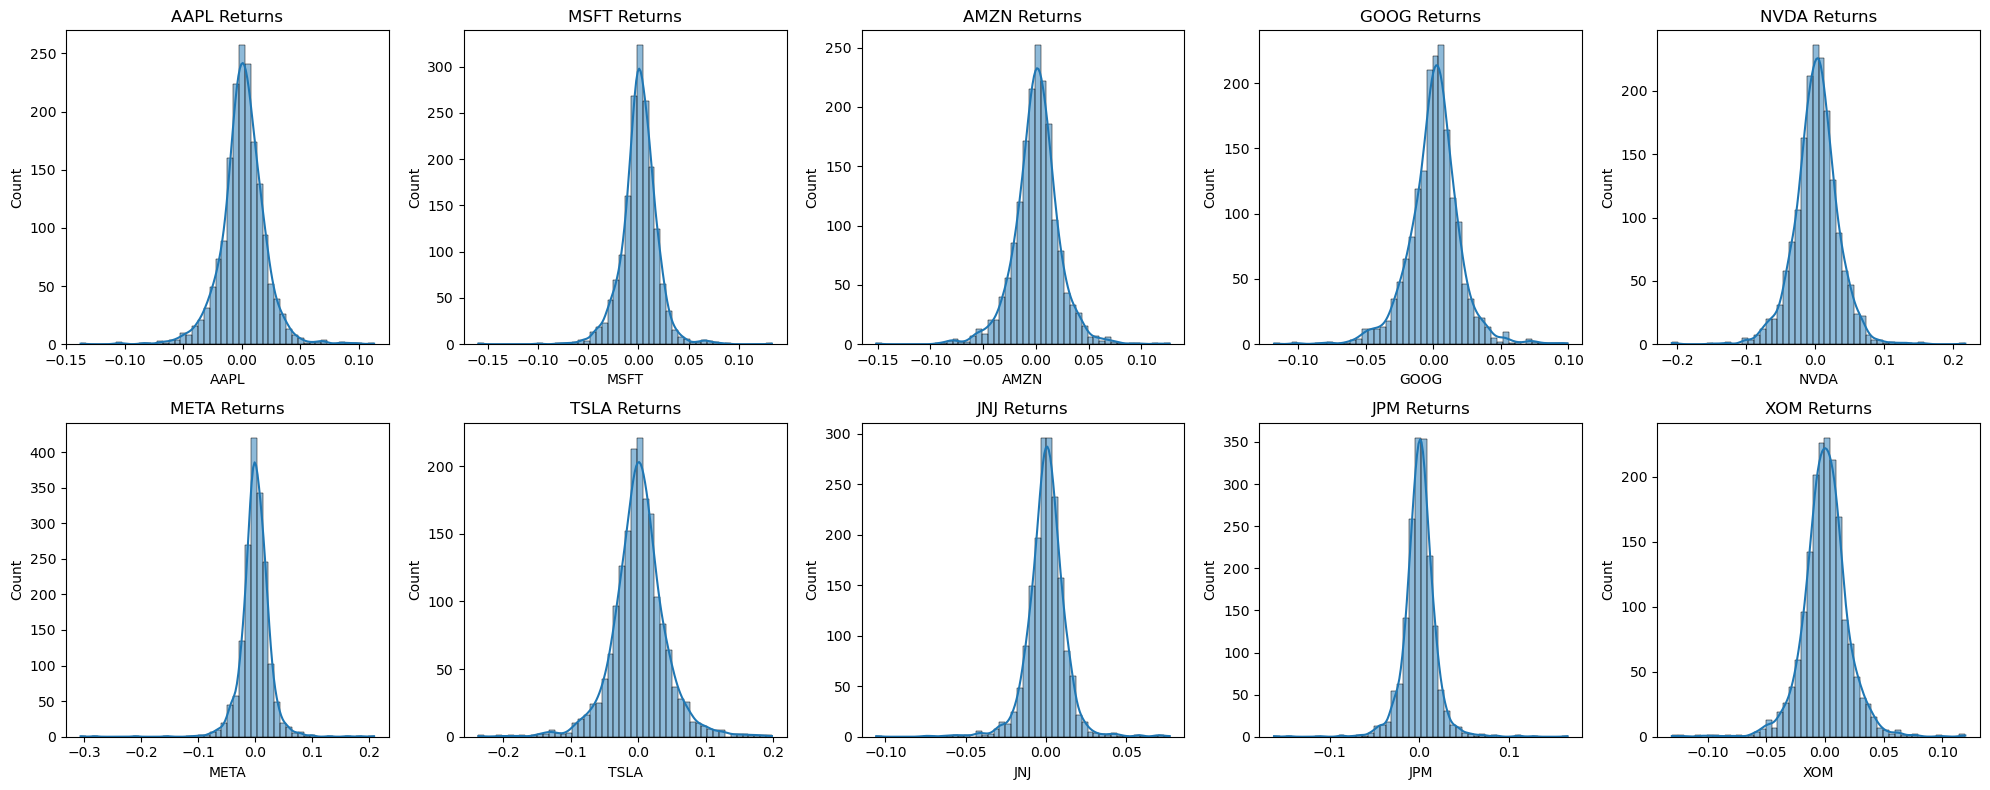

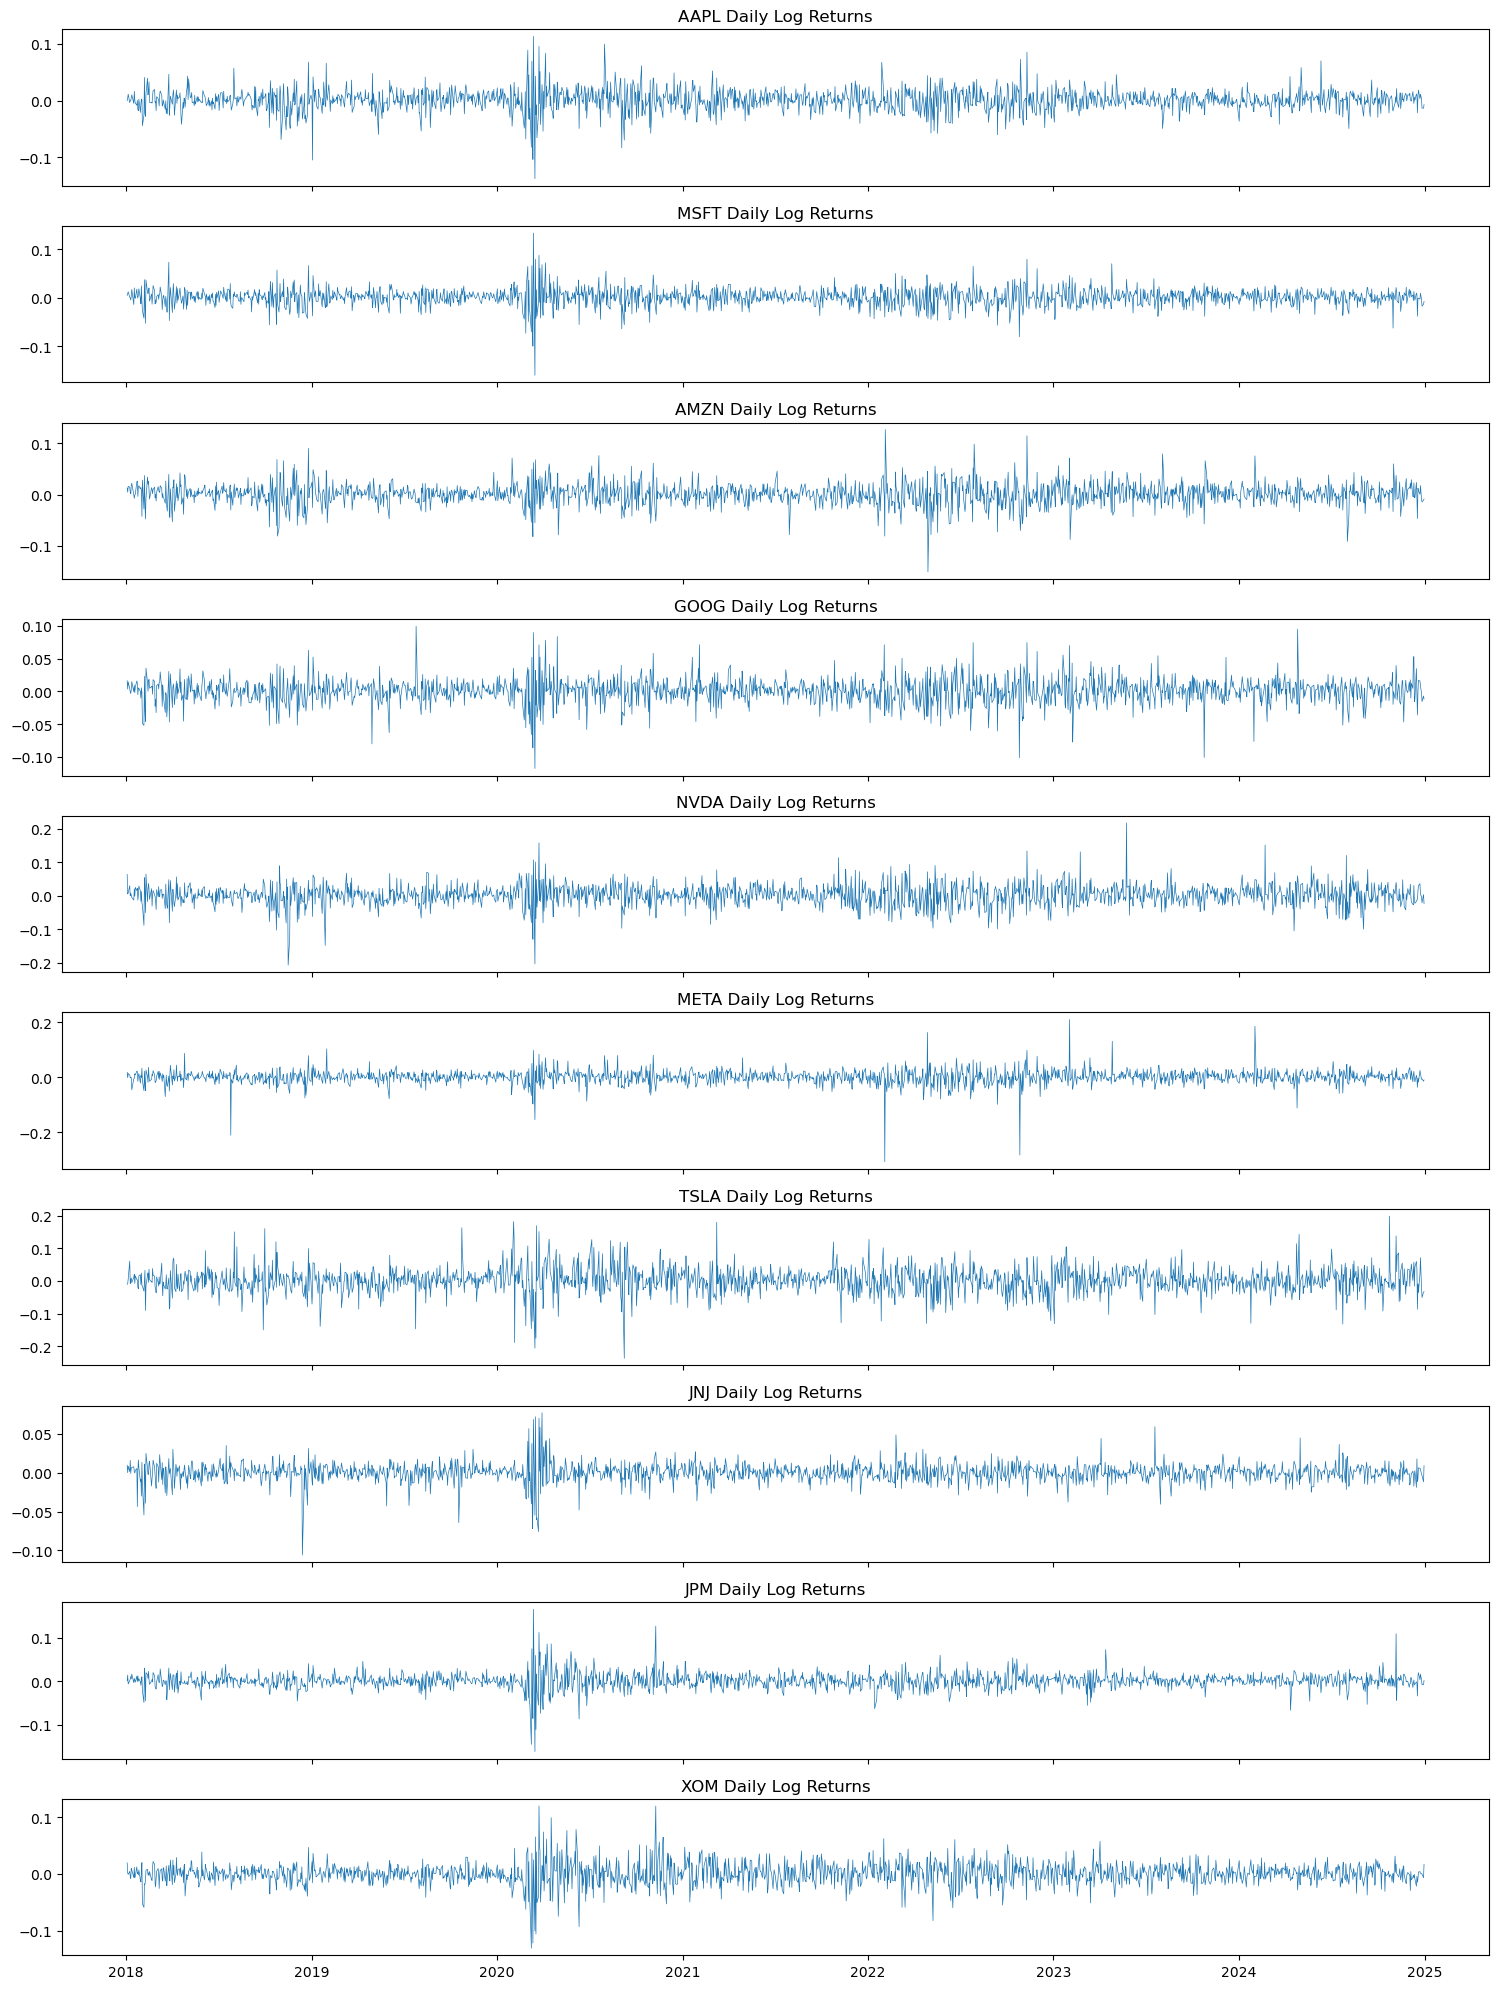

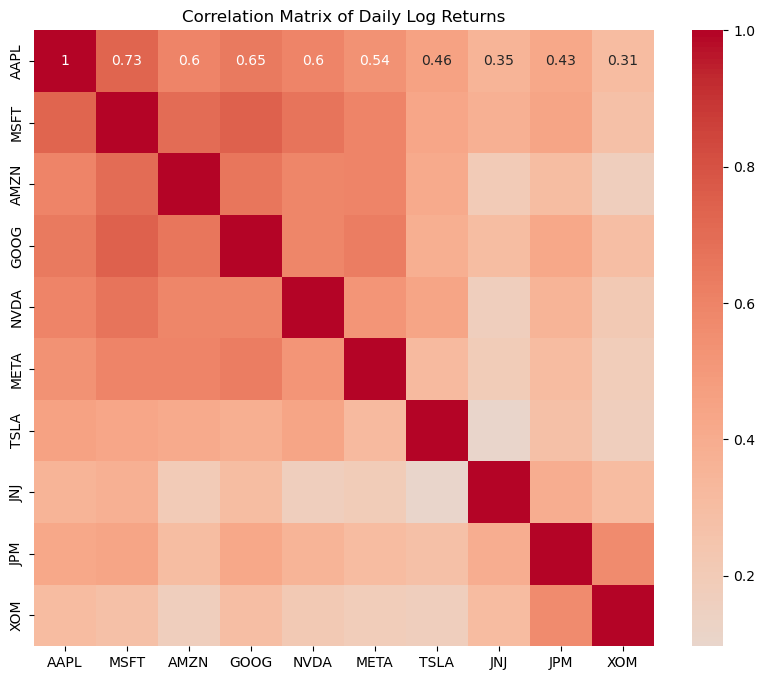

In [17]:
# Load processed prices
df = pd.read_csv("../data/processed/prices.csv", index_col=0, parse_dates=True)

# Compute daily log returns

returns = np.log(df / df.shift(1))



# Drop first row (NaN)
returns = returns.dropna()

# Summary stats
print("Summary statistics of returns:")
display(returns.describe().T)


# Distribution plots (histograms + KDE)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(returns.columns):
    sns.histplot(returns[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Returns")

plt.tight_layout()
plt.show()


# Volatility clustering
fig, axes = plt.subplots(len(returns.columns), 1, figsize=(15, 20), sharex=True)

for i, col in enumerate(returns.columns):
    axes[i].plot(returns.index, returns[col], linewidth=0.5)
    axes[i].set_title(f"{col} Daily Log Returns")

plt.tight_layout()
plt.show()


# Correlation heatmap 
corr = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Daily Log Returns")
plt.show()

# Stylized facts of the Financial Data

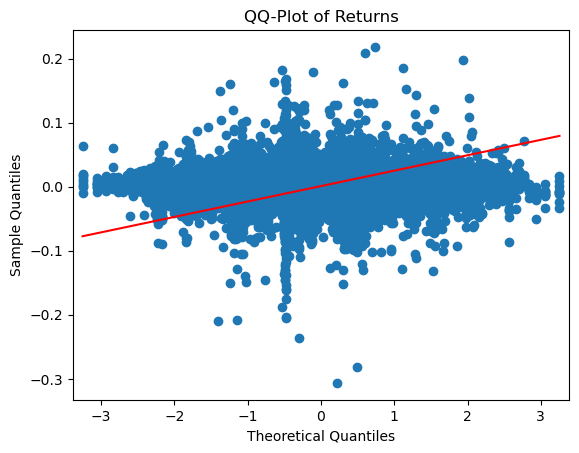

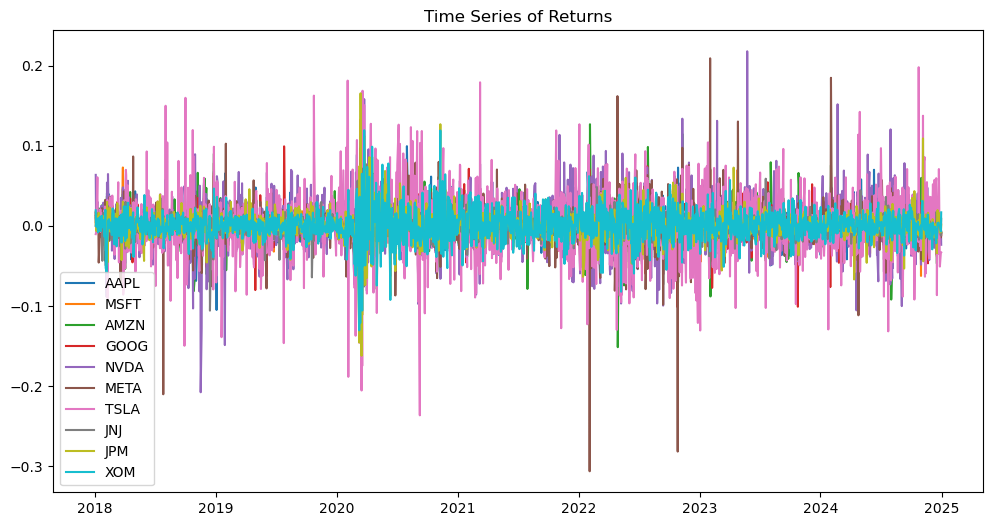

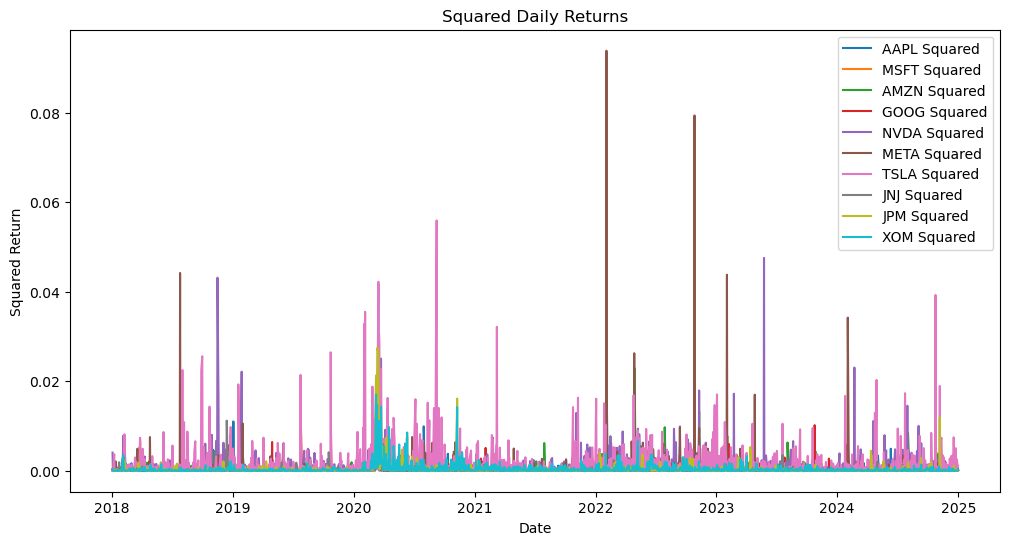

Mean of returns: AAPL    0.001035
MSFT    0.000947
AMZN    0.000742
GOOG    0.000726
NVDA    0.001878
META    0.000668
TSLA    0.001670
JNJ     0.000131
JPM     0.000566
XOM     0.000321
dtype: float64
Variance of returns: AAPL    0.000370
MSFT    0.000331
AMZN    0.000470
GOOG    0.000376
NVDA    0.001051
META    0.000715
TSLA    0.001600
JNJ     0.000152
JPM     0.000346
XOM     0.000382
dtype: float64


In [30]:
# QQ-plot to check normality
sm.qqplot(returns, line='s')
plt.title("QQ-Plot of Returns")
plt.show()


# Volatility clustering

plt.figure(figsize=(12,6))
for col in returns.columns:
    plt.plot(returns.index, returns[col], label=col)
plt.title("Time Series of Returns")
plt.legend()
plt.show()

# Plot squared returns (proxy for volatility clustering)
plt.figure(figsize=(12,6))

for col in returns.columns:
    plt.plot(returns.index, returns[col]**2, label=f"{col} Squared")
plt.title("Squared Daily Returns")
plt.xlabel("Date")
plt.ylabel("Squared Return")
plt.legend()
plt.show()

# Mean ~ 0, Variance ≠ constant 
print("Mean of returns:", returns.mean())
print("Variance of returns:", returns.var())



In [ ]:
from pathlib import Path

# Get current notebook's folder
notebook_dir = Path().resolve()

# Walk up until we hit "2025model_project"
project_root = notebook_dir
while project_root.name != "2025model_project" and project_root != project_root.parent:
    project_root = project_root.parent

print("Project root set to:", project_root)

# Define subfolders relative to root
raw_dir = project_root / "data" / "raw"
processed_dir = project_root / "data" / "processed"

raw_dir.mkdir(parents=True, exist_ok=True)
processed_dir.mkdir(parents=True, exist_ok=True)

# Example save
file_path = processed_dir / "returns.csv"
returns_clean.to_csv(file_path)

print(f" Saved cleaned returns to {file_path}")

📂 Project root set to: /Users/jensentung/Documents/Projects/2025model_project
 Saved cleaned returns to /Users/jensentung/Documents/Projects/2025model_project/data/processed/returns.csv
